In [1]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#1.Load the data file using pandas. 

data = pandas.read_csv("C:\\Users\\nagas\\OneDrive\\Data Analysis\\PYTHON\\project\\googleplaystore.csv")
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
data.shape

(10841, 13)

In [6]:
#2.Check for null values in the data. Get the number of null values for each column

data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
null_App = pandas.isnull(data['App'])
print(null_App.sum())

0


In [8]:
null_category = pandas.isnull(data['Category'])
print(null_category.sum())

0


In [9]:
pandas.isnull(data['Rating']).sum()

1474

In [10]:
pandas.isnull(data['Reviews']).sum()

0

In [11]:
pandas.isnull(data['Size']).sum()

0

In [12]:
pandas.isnull(data['Installs']).sum()

0

In [13]:
pandas.isnull(data['Type']).sum()

1

In [14]:
pandas.isnull(data['Price']).sum()

0

In [15]:
pandas.isnull(data['Content Rating']).sum()

1

In [16]:
pandas.isnull(data['Genres']).sum()

0

In [17]:
pandas.isnull(data['Last Updated']).sum()

0

In [18]:
pandas.isnull(data['Current Ver']).sum()

8

In [19]:
pandas.isnull(data['Android Ver']).sum()

3

In [20]:
# From the above information I can say that Rating column contains 1474 null values,Type column contains 1 null value, 
# Content Rating contains 1 null value, Current Ver column contains 8 null values and Android ver column contains 3 null values.
# All the remaining columns do not contain any null values in our data.

In [21]:
#3.Drop records with nulls in any of the columns.

data.dropna(axis=0,inplace=True)
data.shape

(9360, 13)

In [22]:
''' 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
      
  #1.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
       # 1.. Extract the numeric value from the column
       # 2.. Multiply the value by 1,000, if size is mentioned in Mb
       
'''
        
data['Size'] = data['Size'].apply(pandas.to_numeric,errors='ignore')
def convert_values(value):
    if value[-1]=='M':
        return (float(value[:-1]))*1000
    elif value[-1]=='k':
        return float(value[:-1])
    else:
        return np.nan
data['Size'] = data['Size'].map(lambda x:convert_values(x))
data.head(5)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
# 2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

print(data.dtypes['Reviews'])
data['Reviews'] = data['Reviews'].apply(pandas.to_numeric, errors='ignore')
print(data.dtypes['Reviews'])

object
int64


In [24]:
# Installs field is currently stored as string and has values like 1,000,000+. 

     #1.Treat 1,000,000+ as 1,000,000
    # 2. remove ‘+’, ‘,’ from the field, convert it to integer
    
print(data.dtypes['Installs'])
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].apply(pandas.to_numeric,errors='ignore')
data.head(5)
print(data.dtypes['Installs'])

object
int64


In [25]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

print(data.dtypes['Price'])
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].apply(pandas.to_numeric,errors='ignore')
print(data.dtypes['Price'])
data.head(2)

object
float64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [27]:
print(data.loc[[9220]])

                             App Category  Rating  Reviews   Size  Installs  \
9220  Electrician Calculator Pro    TOOLS     3.9       47  270.0      1000   

      Type  Price Content Rating Genres  Last Updated Current Ver Android Ver  
9220  Paid  14.99       Everyone  Tools  June 3, 2014         3.1  1.6 and up  


In [28]:
data.shape

(9360, 13)

In [29]:
'''5. Sanity checks:
1.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
2.Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
3.For free apps (type = “Free”), the price should not be >0. Drop any such rows.
'''

print(data.dtypes['Rating'])
print(data['Rating'].max())
print(data['Rating'].min())
# i see that all the ratings are between 1 and 5 , so i dont have to drop any rows

print(data['Reviews'].count())
print(data['Installs'].count())

# Reviews and Installs are of same number so i dont have to drop any records

pandas.unique(data['Type'])
(data[(data['Type']=='Free') & (data['Price']>0)])

# There are no rows where The App is Free and price >0 , so i dont have to drop any rows




float64
5.0
1.0
9360
9360


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Text(0.5, 1.0, 'Price of Apps')

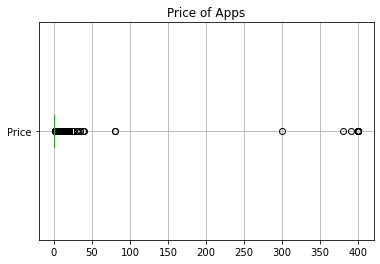

In [30]:
'''
5. Performing univariate analysis: 

Boxplot for Price
Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews
Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating
How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size
Note down your observations for the plots made above. Which of these seem to have outliers?

'''


data.head(5)
data.boxplot(column = 'Price',vert=False)
plt.title('Price of Apps')


Text(0.5, 1.0, 'Price of Apps')

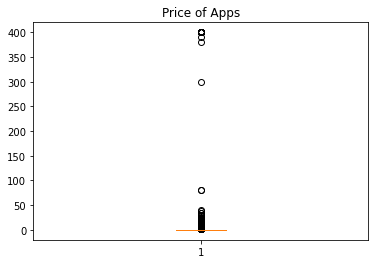

In [31]:
plt.boxplot(data.Price)
plt.title('Price of Apps')

In [32]:
# here in the above boxplot there are some outliers for App prices as some of the prices are almost near 200

Text(0.5, 1.0, 'Boxplot for Reviews')

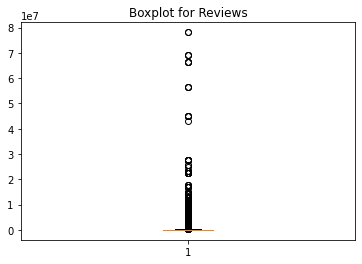

In [33]:
# boxplot of Reviews

plt.boxplot(data['Reviews'])
plt.title('Boxplot for Reviews')

Text(0.5, 1.0, 'Histogram of Ratings')

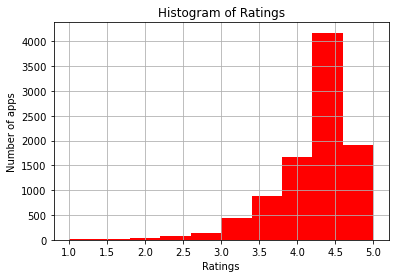

In [34]:
#Histogram for Rating
#How are the ratings distributed? Is it more toward higher ratings?

data.hist(column='Rating',color='red')
plt.xlabel('Ratings')
plt.ylabel('Number of apps')
plt.title('Histogram of Ratings')

In [35]:
# here in the histogram i can tell that most app ratings are between 4.0 and 4.6 and the apps with low ratings are very little

Text(0.5, 1.0, 'Histogram for Size')

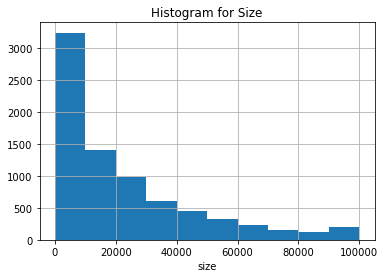

In [36]:
#Histogram for Size
#Note down your observations for the plots made above. Which of these seem to have outliers?

data.hist(column='Size')
plt.xlabel('size')
plt.title('Histogram for Size')

In [37]:
# from the Size histogram we can tell that there are more apps with the size between 0 and 20000 kb.There are less apps with sizes greater than 80Mb


In [38]:
data['Reviews'].value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
47386      1
624924     1
33053      1
4383       1
739329     1
Name: Reviews, Length: 5990, dtype: int64

In [39]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


400.0
(9360, 13)
(9345, 13)
(8892, 13)
maximum of install is 1000000000
mean of Installs count is 6262446.33805668


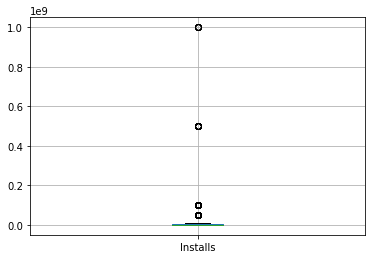

In [40]:
'''
6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

'''
print(data['Price'].max())
print(data.shape)
high_price_rows=data[data['Price']>100].index
data.drop(high_price_rows,inplace=True)
print(data.shape)

data['Reviews'].max()
star_reviews_rows= data[data['Reviews']>2000000].index
data.drop(star_reviews_rows, inplace=True)
print(data.shape)

data.boxplot(column='Installs')
print("maximum of install is", data['Installs'].max())
print('mean of Installs count is',data['Installs'].mean())
percentile = [.10,.25,.50,.70,.90,.95,.99]
data['Installs'].describe(percentiles = percentile)
# i am making 6000000 as threshhold cutoff
high_installs = data[data['Installs']>50000000].index
data.drop(high_installs,inplace=True)

C:\Users\nagas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

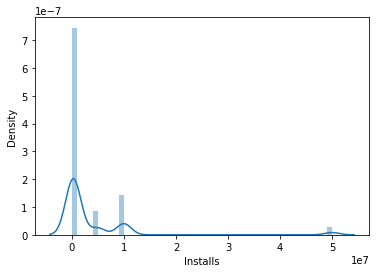

In [41]:
sns.distplot(data['Installs'])

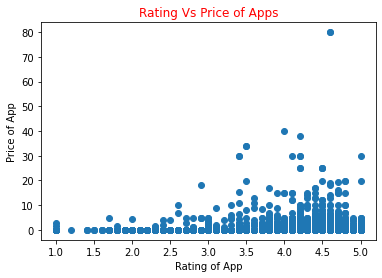

In [42]:
'''

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

 '''

# scatter plot for Rating vs Price

plt.scatter(data['Rating'],data['Price'])
plt.xlabel('Rating of App')
plt.ylabel('Price of App')
plt.title('Rating Vs Price of Apps',color='Red')
plt.show()

In [43]:
# obseravations:  i dont see any clear pattern here, i cant tell if ratings are increased with price or viceversa. 
# an App with rating 5 is lower cost than App with rating 4.3..
# so I have to say that the Price of the app depends on other than just the Rating of the app

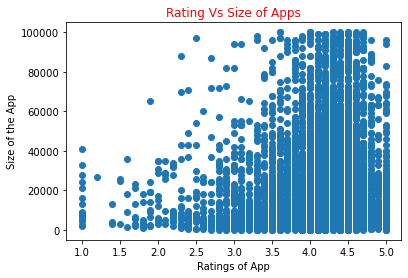

In [44]:
# scatter plot for Rating vs Size

plt.scatter(data['Rating'],data['Size'])
plt.title('Rating Vs Size of Apps',color = 'Red')
plt.xlabel('Ratings of App')
plt.ylabel('Size of the App')
plt.show()

In [45]:
# observations: 
#Here we can say that Ratings of the Apps somewhat depends on the Size of the Apps as Size increases, ratings increased in so many cases
# But we can say that Ratings does not only depends on size but other variables alse
# heavier apps tends to have little more Ratings than lighter apps

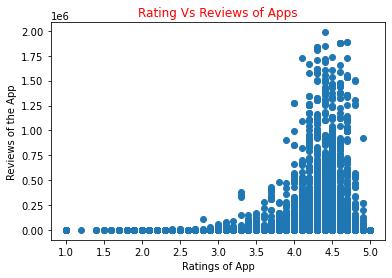

In [46]:
# scatter plot between Ratings and Reviews

plt.scatter(data['Rating'],data['Reviews'])
plt.title('Rating Vs Reviews of Apps',color = 'Red')
plt.xlabel('Ratings of App')
plt.ylabel('Reviews of the App')
plt.show()

In [47]:
# observations:
# According to scatter plot we can say that more reviews have an impact on the Ratings of the Apps 
# As the reviews increases we have a little better rating 
# But Ratings doesnot solely depend on the Reviews because we cans ee that high Rating Apps have less Reviews.

object


(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Adults only 18+'),
  Text(2, 0, 'Everyone'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Mature 17+'),
  Text(5, 0, 'Teen'),
  Text(6, 0, 'Unrated')])

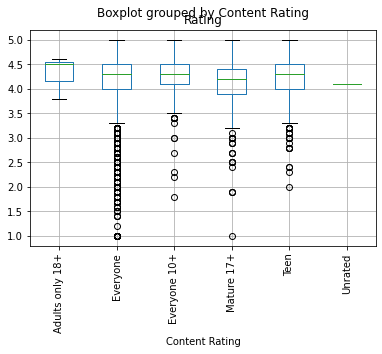

In [48]:
# boxplot for Rating vs COntent Rating

print(data['Content Rating'].dtypes)
data.boxplot(column=['Rating'],by='Content Rating', grid=True)
plt.xticks(rotation=90)

In [49]:
# observations :
# The Apps with Adult Content Rating has more ratings

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(1, 0, 'ART_AND_DESIGN'),
  Text(2, 0, 'AUTO_AND_VEHICLES'),
  Text(3, 0, 'BEAUTY'),
  Text(4, 0, 'BOOKS_AND_REFERENCE'),
  Text(5, 0, 'BUSINESS'),
  Text(6, 0, 'COMICS'),
  Text(7, 0, 'COMMUNICATION'),
  Text(8, 0, 'DATING'),
  Text(9, 0, 'EDUCATION'),
  Text(10, 0, 'ENTERTAINMENT'),
  Text(11, 0, 'EVENTS'),
  Text(12, 0, 'FAMILY'),
  Text(13, 0, 'FINANCE'),
  Text(14, 0, 'FOOD_AND_DRINK'),
  Text(15, 0, 'GAME'),
  Text(16, 0, 'HEALTH_AND_FITNESS'),
  Text(17, 0, 'HOUSE_AND_HOME'),
  Text(18, 0, 'LIBRARIES_AND_DEMO'),
  Text(19, 0, 'LIFESTYLE'),
  Text(20, 0, 'MAPS_AND_NAVIGATION'),
  Text(21, 0, 'MEDICAL'),
  Text(22, 0, 'NEWS_AND_MAGAZINES'),
  Text(23, 0, 'PARENTING'),
  Text(24, 0, 'PERSONALIZATION'),
  Text(25, 0, 'PHOTOGRAPHY'),
  Text(26, 0, 'PRODUCTIVITY'),
  Text(27, 0, 'SHOPPING'),
  Text(28, 0, 'SOCIAL'),
  Text(29, 0, '

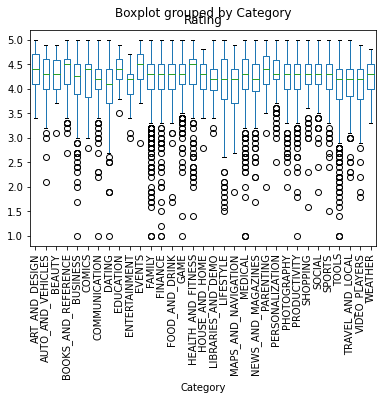

In [50]:
# Boxplot of Rating vs Category

data.boxplot(column='Rating',by='Category',grid=False,widths=0.6)
plt.xticks( rotation=90)

In [51]:
# observations:
# Art And Design and Events has almost more Ratings than any other Apps

In [52]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [53]:
'''
8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew. 
Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating.
This needs to be done as the models do not understand categorical data, and all data should be numeric.
Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

'''


inp1 = data.copy()
print(inp1.head(2))

inp1['Installs'] = inp1['Installs'].apply(np.log1p)
inp1.head(4)

inp1['Reviews'] = inp1['Reviews'].apply(np.log1p)
inp1.head(4)



                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [54]:
inp1.shape

(8750, 13)

In [55]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [56]:
inp1.drop(['Last Updated','Current Ver','Android Ver','App'],inplace=True,axis=1)
inp1.shape

(8750, 9)

In [57]:
'''
Get dummy columns for Category, Genres, and Content Rating.
This needs to be done as the models do not understand categorical data, and all data should be numeric.
Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
'''

inp2 = inp1.copy()
inp2.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity


In [58]:
inp2.shape

(8750, 9)

In [59]:
inp2['Category'].unique

<bound method Series.unique of 0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10834                 FAMILY
10836                 FAMILY
10837                 FAMILY
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 8750, dtype: object>

In [60]:
inp2['Category'] = inp2['Category'].astype('category')
# Assigning numerical values and storing in another column
inp2['Category_Cat'] = inp2['Category'].cat.codes
inp2['Content Rating'] = inp2['Content Rating'].astype('category')
inp2['Content_cat'] = inp2['Content Rating'].cat.codes
inp2['Genres'] = inp2['Genres'].astype('category')
inp2['Genres_cat'] = inp2['Genres'].cat.codes
inp2['Type'] = inp2['Type'].astype('category')
inp2['Type_cat'] = inp2['Type'].cat.codes
inp2.drop(['Category','Type','Content Rating','Genres'],axis=1,inplace=True)
inp2

,Rating,Reviews,Size,Installs,Price,Category_Cat,Content_cat,Genres_cat,Type_cat
0,4.1,5.075174,19000.0,9.210440,0.0,0,1,9,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,1,11,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,1,9,0
3,4.5,12.281389,25000.0,17.727534,0.0,0,4,9,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,1,10,0
...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,11,1,37,0
10836,4.5,3.663562,53000.0,8.517393,0.0,11,1,37,0
10837,5.0,1.609438,3600.0,4.615121,0.0,11,1,37,0
10839,4.5,4.744932,NaN,6.908755,0.0,3,3,18,0


In [61]:
# dependent variable is Rating
inp2_target = inp2['Rating']
print(inp2_target)
print("min Rating of the App is", np.min(inp2_target))
print("max Rating of the App is",np.max(inp2_target))
print("mean Rtaing of the App is", np.mean(inp2_target))
inp2_target

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8750, dtype: float64
min Rating of the App is 1.0
max Rating of the App is 5.0
mean Rtaing of the App is 4.178411428571438


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8750, dtype: float64

In [62]:
inp2.head(2)
inp2.dropna(inplace=True)
print(inp2.shape)

(7429, 9)


In [63]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_Cat,Content_cat,Genres_cat,Type_cat
0,4.1,5.075174,19000.0,9.210440,0.0,0,1,9,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,1,11,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,1,9,0
3,4.5,12.281389,25000.0,17.727534,0.0,0,4,9,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,1,10,0
...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,0.0,3,1,18,0
10834,4.0,2.079442,2600.0,6.216606,0.0,11,1,37,0
10836,4.5,3.663562,53000.0,8.517393,0.0,11,1,37,0
10837,5.0,1.609438,3600.0,4.615121,0.0,11,1,37,0


In [64]:
feature_col = list(inp2.columns[1:8])
feature_col

['Reviews',
 'Size',
 'Installs',
 'Price',
 'Category_Cat',
 'Content_cat',
 'Genres_cat']

In [65]:
corr = inp2[feature_col]
corr

,Reviews,Size,Installs,Price,Category_Cat,Content_cat,Genres_cat
0,5.075174,19000.0,9.210440,0.0,0,1,9
1,6.875232,14000.0,13.122365,0.0,0,1,11
2,11.379520,8700.0,15.424949,0.0,0,1,9
3,12.281389,25000.0,17.727534,0.0,0,4,9
4,6.875232,2800.0,11.512935,0.0,0,1,10
...,...,...,...,...,...,...,...
10833,3.806662,619.0,6.908755,0.0,3,1,18
10834,2.079442,2600.0,6.216606,0.0,11,1,37
10836,3.663562,53000.0,8.517393,0.0,11,1,37
10837,1.609438,3600.0,4.615121,0.0,11,1,37


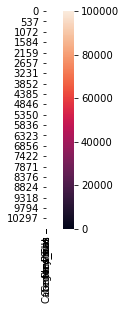

In [66]:
sns.heatmap(corr, cbar=True, square=True)
plt.show()

In [67]:
correlation1 = inp2['Rating'].corr(inp2['Size'])
correlation1

0.06510245815618322

In [68]:
correlation2 = inp2['Rating'].corr(inp2['Reviews'])
correlation2

0.16176831525227742

In [69]:
correlation3 = inp2['Rating'].corr(inp2['Installs'])
correlation3

0.0620417367746353

In [70]:
correlation4 = inp2['Rating'].corr(inp2['Price'])
correlation4

0.024184158449672543

In [71]:
correlation5 = inp2['Rating'].corr(inp2['Category_Cat'])
correlation5

-0.04970859711210516

In [72]:
correlation6 = inp2['Rating'].corr(inp2['Content_cat'])
correlation6

0.02133390053617636

In [73]:
correlation7 = inp2['Rating'].corr(inp2['Genres_cat'])
correlation7

-0.054109517817877636

In [74]:
correlation8 = inp2['Rating'].corr(inp2['Type_cat'])
correlation8

0.050429835838878986

In [75]:
#9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

df_train,df_test = train_test_split(inp2,test_size=0.3,random_state=3)
print("Training dataframe is", df_train.head(5))
print("Testing Dataframe is",df_test)




Training dataframe is        Rating    Reviews     Size   Installs  Price  Category_Cat  \
9906      4.0   1.098612  12000.0   3.931826    0.0            21   
10011     3.8   9.160520  82000.0  11.512935    0.0            11   
612       5.0   1.791759   4400.0   6.908755    0.0             7   
5881      4.7   4.262680  14000.0   6.908755    0.0            31   
8437      3.9  10.637873  63000.0  13.815512    0.0            14   

       Content_cat  Genres_cat  Type_cat  
9906             1          73         0  
10011            2         101         0  
612              3          36         0  
5881             1         110         0  
8437             1           6         0  
Testing Dataframe is        Rating    Reviews     Size   Installs  Price  Category_Cat  \
8750      4.0   1.945910   4200.0   6.908755    0.0             6   
8323      4.3   3.218876   8000.0   6.908755    0.0             4   
7716      4.3   2.772589  14000.0   9.210440    0.0            30   
3373    

In [76]:
#10. Separate the dataframes into X_train, y_train, X_test, and y_test.

independent_df=inp2[['Reviews','Installs','Size','Genres_cat','Type_cat','Price','Category_Cat','Content_cat']]
dependent_df=inp2[['Rating']]
x_train, x_test, y_train, y_test = train_test_split(independent_df, dependent_df, test_size=0.3, random_state=3)
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (5200, 8)
y_train shape is  (5200, 1)
x_test shape is  (2229, 8)
y_test shape is  (2229, 1)


In [77]:
'''

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

'''

model=LinearRegression()
model.fit(x_train, y_train)
pv=model.predict(x_test)

In [78]:
print("R2 value of the model is ", r2_score(y_test, pv))

R2 value of the model is  0.1108335541909854


In [79]:
print("Mean squared error is ", mean_squared_error(y_test, pv))

Mean squared error is  0.25652328325093415
